In [ ]:
import numpy as np

import torch
from torch import nn
from IPython.display import Image

## Loss functions - функции потерь

[PyTorch loss functions](https://pytorch.org/docs/stable/nn.html#loss-functions)

Функции потерь используются для измерения ошибки между прогнозируемым и целевым значением. Функция потерь говорит нам, насколько модель далека от идеальной.

Слово «loss» означает штраф, который модель получает за то выдает неидеальные результаты.

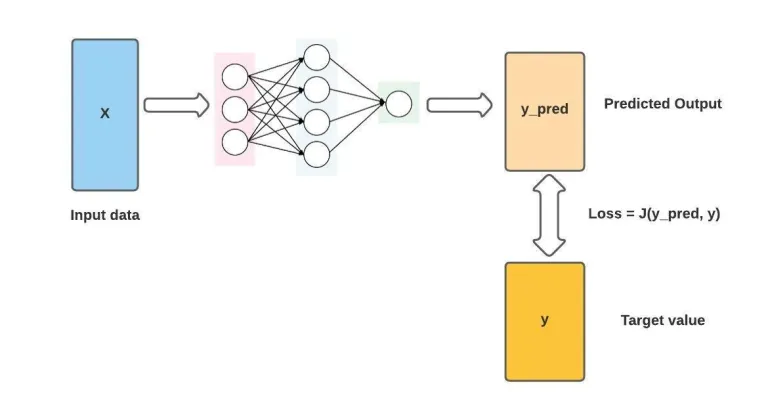

Функция потерь зависит от того, какую задачу мы решаем.

### Регрессия

####  Mean Squared Error

Средняя квадратическая ошибка (MSE) — популярная функция потерь для задач регрессии, где модель предсказывает вещественные числа.

Для $i$-го объекта выборки, если выходной вектор состоит из $C$ компонент, средняя квадратическая ошибка между выходом модели $\hat{y}$ и целевым вектором $y$ будет равна

$$\large \text{MSE}_i\left(\hat{y},y\right)=\frac{1}{C} \sum_{k=1}^{C}{\left(\hat{y}_{ik}-y_{ik}\right)^2}$$



**Примечание, относящееся ко всем функциям потерь в PyTorch, которые будут рассмотрены ниже.**

При вычислении по всему набору данных (или по мини-батчу) из $N$ объектов ошибка на отдельных объектах может усредняться или суммироваться. За это отвечает параметр `reduction`, который принимает значения `"mean"` или `"sum"`, а также может принимать значение `"none"`, при котором агрегация производиться не будет, и тогда функция будет возвращать тензор значений размером $N$.

По умолчанию в большинстве функций потерь в PyTorch `reduction="mean"`.


In [ ]:
loss_fn = nn.MSELoss()

model_output = torch.Tensor([0.5, -0.25, 0.75])
print(f"model_output: {model_output}")

target = torch.Tensor([1, 0.25, 0.25])
print(f"target: {target}")

loss_mse = loss_fn(model_output, target)
print(f"loss_mse: {loss_mse}")

model_output: tensor([ 0.5000, -0.2500,  0.7500])
target: tensor([1.0000, 0.2500, 0.2500])
loss_mse: 0.25


- **Преимущество:** MSE штрафует за большие ошибки в предсказаниях, так как ошибки возводятся в квадрат.

- **Недостаток:** MSE сильно акцентируется на выбросах, что может быть нежелательно для задач, где важнее высокая точность на большинстве примеров, а не устранение одиночных выбросов.

####  Mean Absolute Error

Средняя абсолютная ошибка (MAE) также применяется для задач регрессии. В отличие от MSE, которая акцентируется на крупных выбросах (ошибка $L_2$), MAE, будучи $L_1$ ошибкой, имеет другие свойства и может быть более устойчивой к выбросам.

Для $i$-го объекта выборки, если выходной вектор состоит из $C$ компонент, средняя абсолютная ошибка между выходом модели $\hat{y}$ и целевым вектором $y$ будет равна:

$$\large \text{MAE}_i\left(\hat{y},y\right)=\frac{1}{C} \sum_{k=1}^{C}{| \hat{y}_{ik}-y_{ik}|}$$


In [ ]:
loss_fn = nn.L1Loss()

# Batch of 1 element and 3 components in output vector
model_output = torch.Tensor([0.5, -0.25, 0.75])
print(f"model_output: {model_output}")

target = torch.Tensor([1, 0.25, 0.25])
print(f"target: {target}")

loss_mae = loss_fn(model_output, target)
print(f"loss_mae: {loss_mae}")

model_output: tensor([ 0.5000, -0.2500,  0.7500])
target: tensor([1.0000, 0.2500, 0.2500])
loss_mae: 0.5


- **Преимущество:** MAE учитывает все ошибки равнозначно и менее чувствительна к выбросам по сравнению с MSE.

- **Недостаток:** Использование MAE может привести к большим ошибкам на отдельных примерах, поскольку модель фокусируется на общей точности, а не на устранении выбросов.

#### Huber Loss

Huber Loss комбинирует среднюю квадратическую ошибку (MSE) и среднюю абсолютную ошибку (MAE). Она применима к задачам регрессии и используется для улучшения устойчивости модели к выбросам. Huber Loss ведёт себя как MSE для небольших ошибок и как MAE для больших ошибок, что позволяет сбалансировать точность и устойчивость. Выбор порога, при котором происходит переключение между MSE и MAE, задаётся гиперпараметром $\delta$.

<center><img src="https://edunet.kea.su/repo/EduNet-content/dev-2.3/L05/out/mse_mae_huber_losses.png" width="750"></img></center>

Для $i$-го объекта выборки, если выходной вектор состоит из $C$ компонент, Huber Loss между выходом модели $\hat{y}$ и целевым вектором $y$ будет равна:

$$\large \text{Huber Loss}_i(\hat{y},y)=\frac{1}{C} \sum_{k=1}^{C}{l_{ik}},$$

где:

$$\large
l_{ik} =
\begin{cases}
\dfrac{1}{2} \left(\hat{y}_{ik}-y_{ik}\right)^2, & \text{if}\ \  |\hat{y}_{ik}-y_{ik}| < \delta \\
\delta \left(|\hat{y}_{ik}-y_{ik}| - \dfrac{1}{2} \delta\right), & \text{else}
\end{cases}
$$



In [ ]:
loss_fn = nn.HuberLoss()

# Batch of 1 element and 3 components in output vector
model_output = torch.Tensor([0.5, -0.25, 0.75])
print(f"model_output: {model_output}")

target = torch.Tensor([1, 0.25, 0.25])
print(f"target: {target}")

huber_loss = loss_fn(model_output, target)
print(f"huber_loss: {huber_loss}")

model_output: tensor([ 0.5000, -0.2500,  0.7500])
target: tensor([1.0000, 0.2500, 0.2500])
huber_loss: 0.125


Huber Loss комбинирует преимущества MSE и MAE и позволяет сбалансировать точность и устойчивость модели к выбросам, но требует выбора значения гиперпараметра $\delta$.

### Классификация

#### nn.NLLLoss


Negative Log-Likelihood - отрицательное логарифмическое правдоподобие.

NLL применяется к моделям с функцией softmax на выходе. **Softmax** - функция активации, которая вычисляет нормализованную экспоненту каждой элемента в слое.

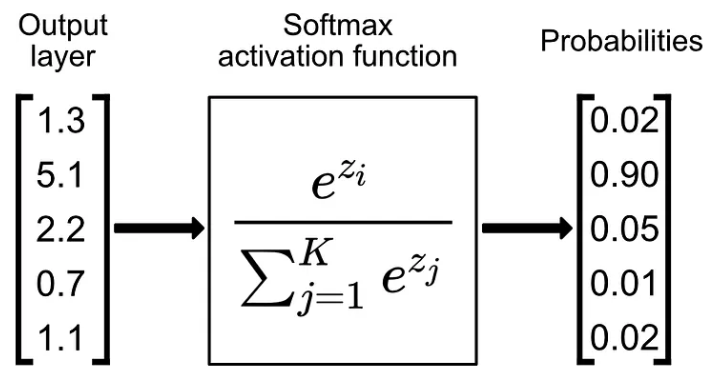

Функция принимает входной вектор размера N, а затем изменяет значения таким образом, чтобы каждое из них находилось в диапазоне от 0 до 1. Кроме того, она нормализует выходные данные таким образом, чтобы сумма N значений вектора была равна 1.



In [ ]:
input_data = np.array([1.3, 5.1, 2.2, 0.7, 1.1])
softmax_result = np.exp(input_data) / np.sum(np.exp(input_data))
softmax_result

array([0.02019046, 0.90253769, 0.04966053, 0.01108076, 0.01653055])

Фактически, решая задачу многоклассовой классификации, мы пытаемся моделировать условное распределение $p(y∣x,θ)$ и построить модель которая максимизирует правдоподобие наблюдаемых данных.

[Функция правдоподобия](https://ru.wikipedia.org/wiki/%D0%A4%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D1%8F_%D0%BF%D1%80%D0%B0%D0%B2%D0%B4%D0%BE%D0%BF%D0%BE%D0%B4%D0%BE%D0%B1%D0%B8%D1%8F)

```
Понятия вероятности и правдоподобия тесно связаны. Сравните два предложения:

- «Какова вероятность выпадения 12 очков в каждом из ста бросков двух костей?»
- «Насколько правдоподобно, что кости не шулерские, если из ста бросков в каждом выпало 12 очков?»
```

Likelihood: $\prod_{j=1}^{N} \hat{y_j}^{y_j}$

Log Likelihood: $\sum_{j=1}^{N} y_j * log(\hat{y_j})$

Negative Log Likelihood: $- \sum_{j=1}^{N} y_j * log(\hat{y_j})$

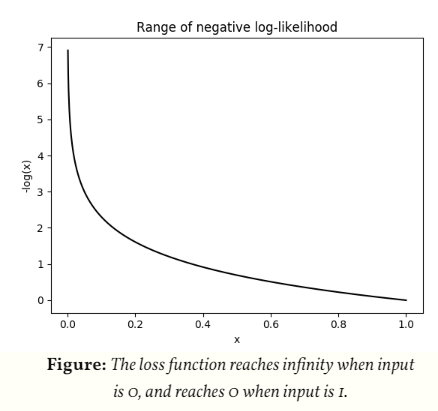

Negative часть в NLL обусловлена тем, что вероятности варьируются от нуля до единицы, а логарифмы значений в этом диапазоне отрицательны.

В NLL модель штрафуется за маленькие вероятности для корректной метки и поощряется за предсказание более высоких вероятностей.

NLL заботится не только о правильности прогноза, но и о том, чтобы модель была уверена в нем.

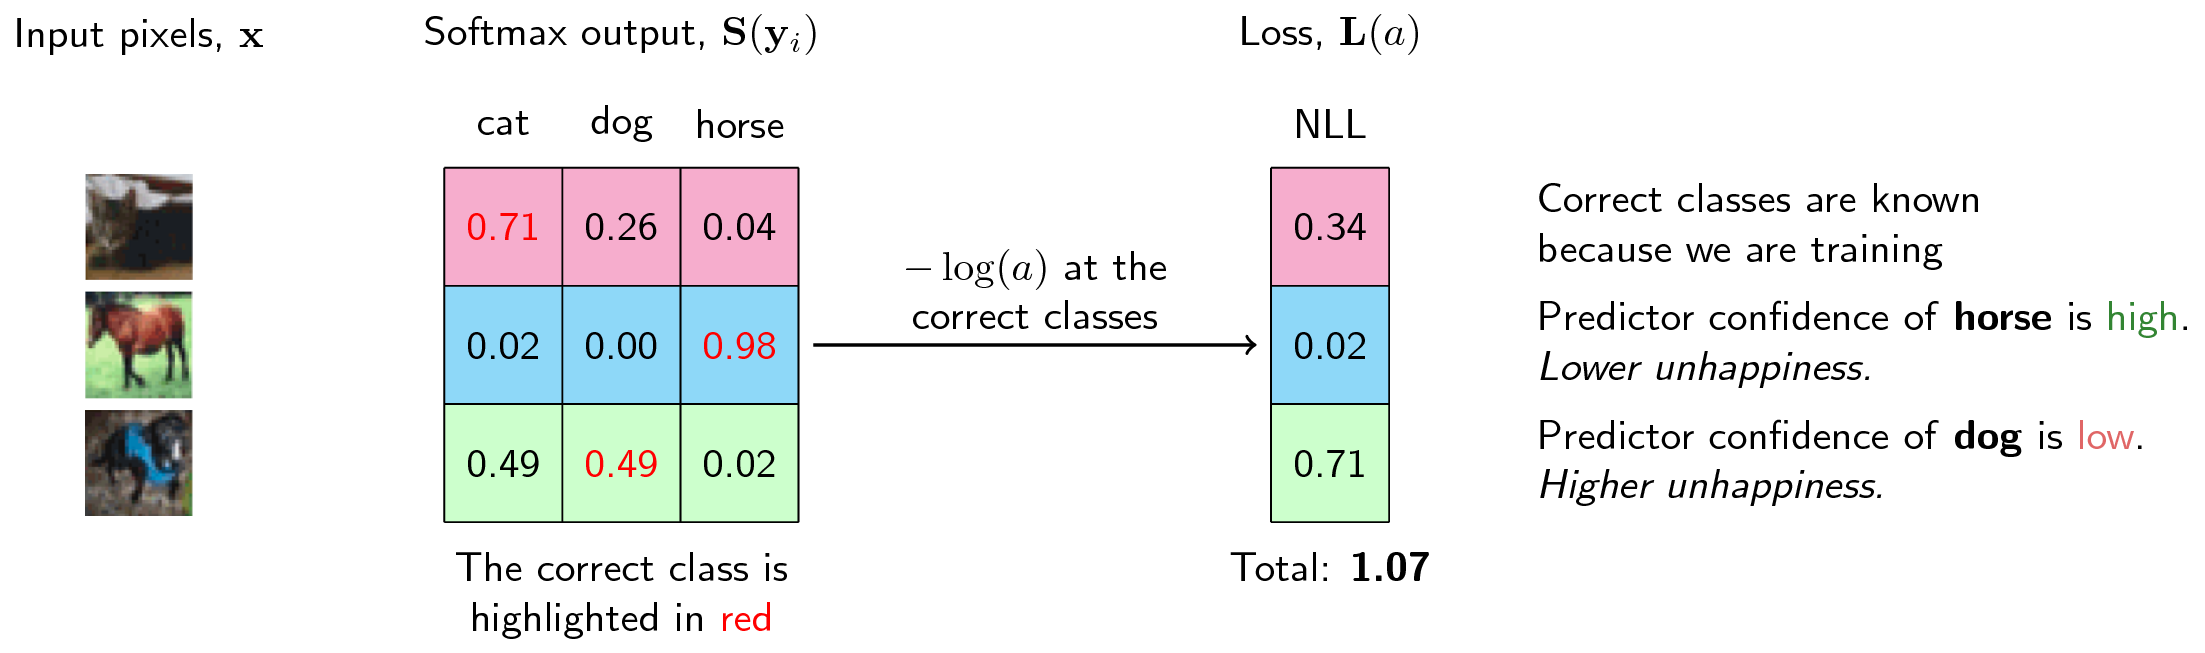

**NB:** [nn.NLLLoss](https://pytorch.org/docs/stable/generated/torch.nn.NLLLoss.html#torch.nn.NLLLoss) ожидает на вход предсказания после [nn.LogSoftmax](https://pytorch.org/docs/stable/generated/torch.nn.LogSoftmax.html)

> The input given through a forward call is expected to contain log-probabilities of each class. i



In [ ]:
log_softmax = nn.LogSoftmax(dim=1)
loss_fn = nn.NLLLoss()

input = torch.randn(3, 5, requires_grad=True)

target = torch.tensor([1, 0, 4])
nll_loss = loss_fn(log_softmax(input), target)
nll_loss.backward()

In [ ]:
input

tensor([[-1.2904,  0.0583,  0.4835, -1.5873, -0.6838],
        [ 0.2169, -0.9001,  0.0707,  1.9532, -1.4512],
        [-1.5918,  0.2309, -0.9613,  0.3658,  0.0933]], requires_grad=True)

In [ ]:
log_softmax(input)

tensor([[-2.5896, -1.2408, -0.8157, -2.8864, -1.9829],
        [-2.0864, -3.2034, -2.2327, -0.3501, -3.7545],
        [-3.0700, -1.2473, -2.4396, -1.1124, -1.3849]],
       grad_fn=<LogSoftmaxBackward0>)

In [ ]:
nll_loss

tensor(1.5707, grad_fn=<NllLossBackward0>)

#### nn.CrossEntropyLoss

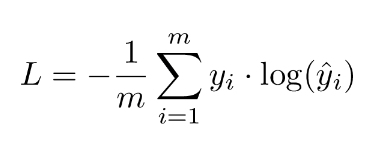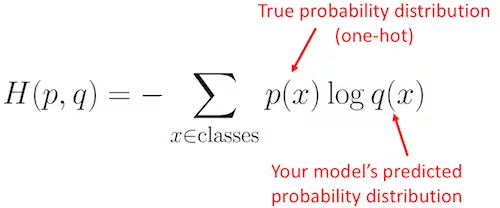

В задаче классификации мы используем softmax для получения вероятностей классов

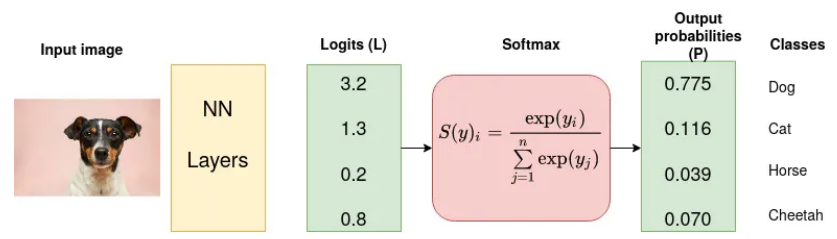

Назначение кросс-энтропии - взять предсказанные вероятности (после softmax) и сравнить с истинным распределением.

Основная цель обучения - сделать предсказания наиболее близкими к целевой переменной

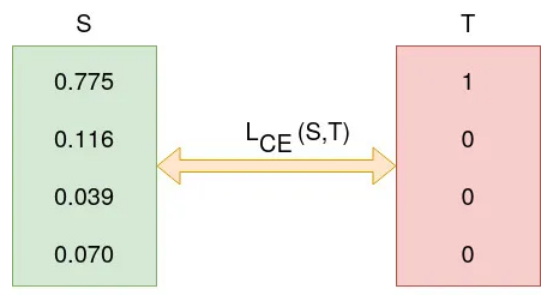

[What is Cross Entropy?](https://towardsdatascience.com/what-is-cross-entropy-3bdb04c13616) - более подробное объяснение с расчетами

Посмотрим на два результата классификации и попробуем понять, какой из них лучше:

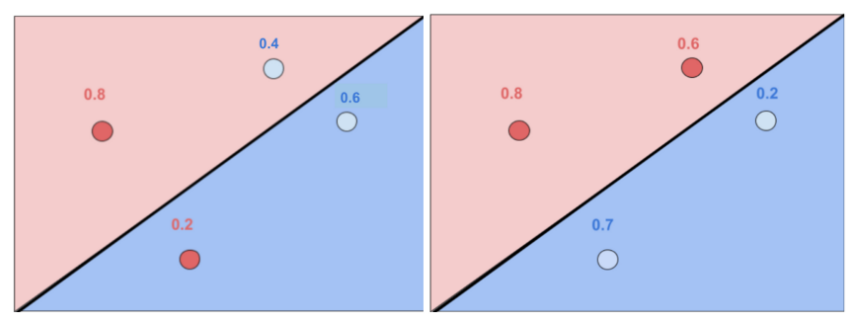

Один из способов оценить результаты классификции – взять вероятности каждой точки в модели и перемножить их. Это даст полную вероятность модели, как мы знаем из общего правила умножения вероятностей.

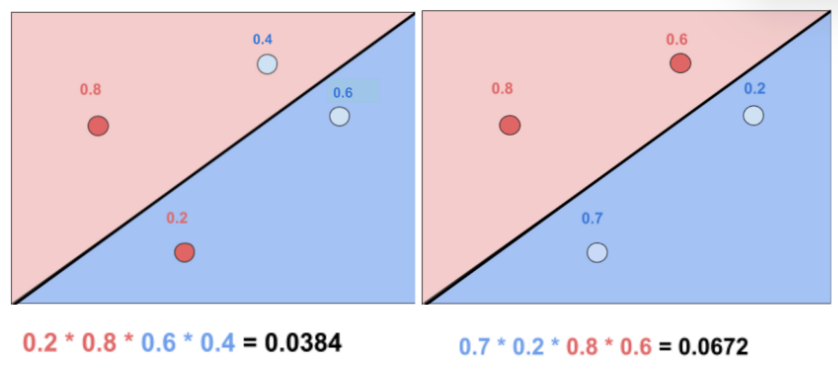

Модель с большей вероятностью лучше, но есть проблема: чем больше наблюдений, тем меньше результирующая вероятность.

Одним словом, использование прозведений – не лучшая идея, но можно это исправить, используя сумму.

Если вы помните правила логарифмирования , есть способ связать произведение с суммой - давайте применим это правило к нашим вероятностям, а также избавимся от отрицательных знаков, сделав логарифмы отрицательными

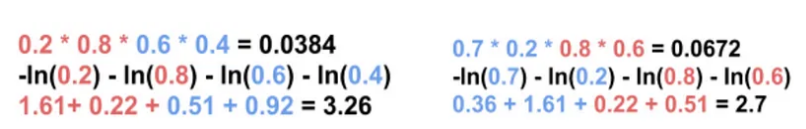

Когда мы вычисляем логарифм для каждой точки данных, мы фактически получаем функцию ошибки для каждой точки. Например, функция ошибки для точки 0,2 в модели A равна -ln(0,2), что равно 1,61

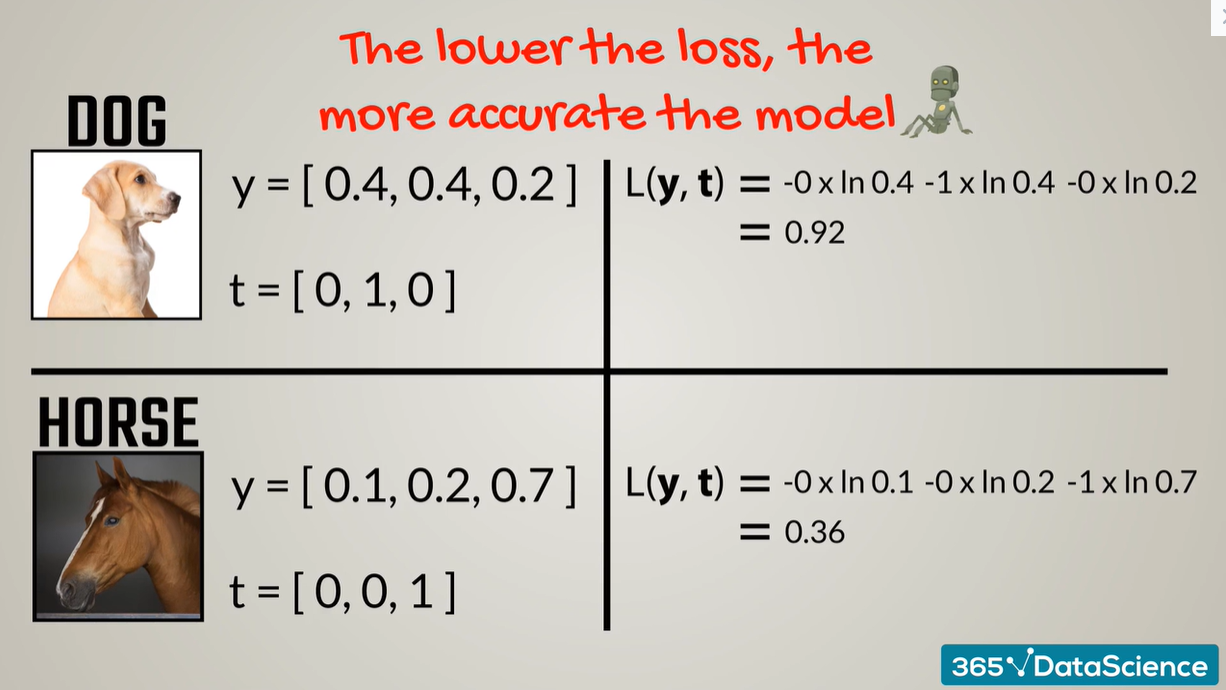

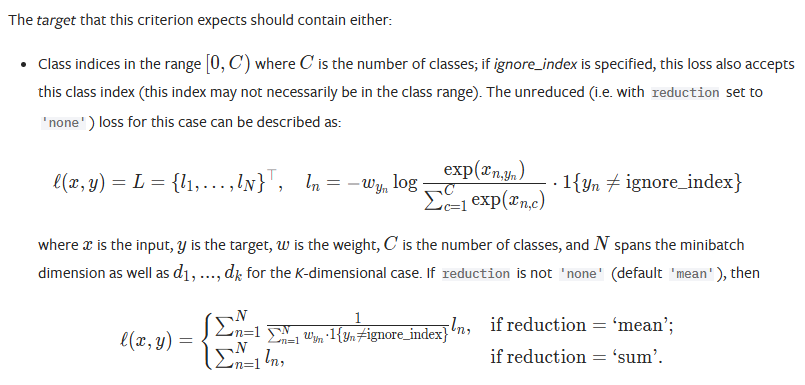

**NB:** [nn.CrossEntropyLoss](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html) ожидает на вход сырые предсказания-логиты




In [ ]:
loss_fn = nn.CrossEntropyLoss()
ce_loss = loss_fn(input, target)
ce_loss.backward()

In [ ]:
ce_loss

tensor(1.5707, grad_fn=<NllLossBackward0>)

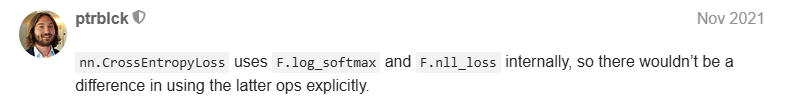

[Из старой имплементации](https://github.com/pytorch/pytorch/blob/677030b1cb12a2ff32fe85a3c2b9cc547ef47de8/torch/nn/functional.py#L1364)

#### nn.BCELoss & nn.BCEWithLogitsLoss

BCELoss - бинарная кроссэнтропия - это функция потерь для бинарной классификации, тогда как категориальная кросс-энтропия — это функция потерь для мультиклассовой классификации.

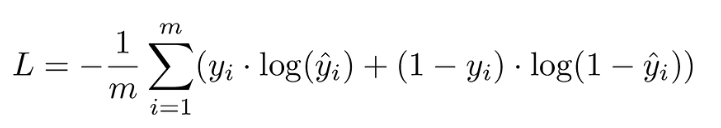

[nn.BCELoss](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html#torch.nn.BCELoss)

**TLDR**: BCELoss в PyTorch ограничивает выходные данные своей логарифмической функции до значений, больших или равных -100

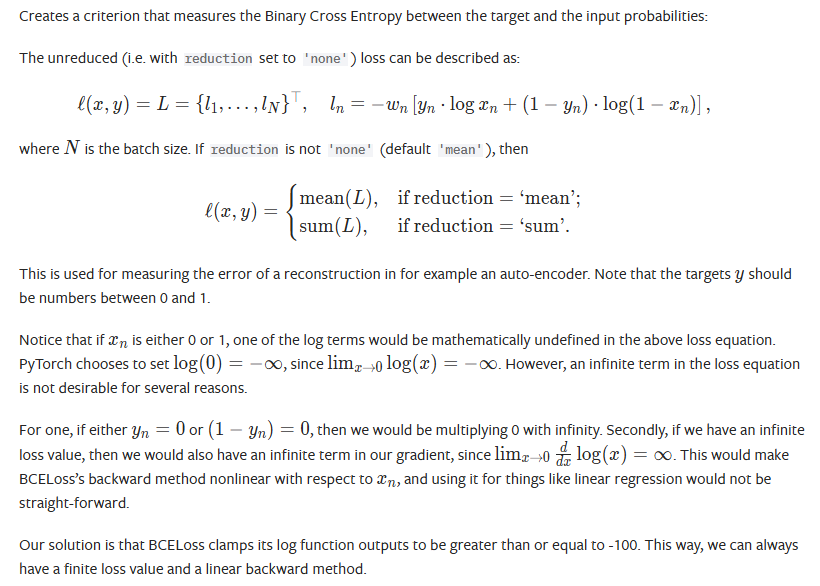

In [ ]:
loss_fn = nn.BCELoss()

model_output = torch.ones(5)
print(f"model_output: {model_output}")

target = torch.zeros(5)
print(f"target: {target}")

loss_bce = loss_fn(model_output, target)
print(f"loss_bce: {loss_bce}")

model_output: tensor([1., 1., 1., 1., 1.])
target: tensor([0., 0., 0., 0., 0.])
loss_bce: 100.0


**NB:** [nn.BCELoss](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html#torch.nn.BCELoss) ожидает на вход предсказания после [nn.Sigmoid](https://pytorch.org/docs/stable/generated/torch.nn.Sigmoid.html)

> Note that the targets y should be numbers between 0 and 1.



[nn.BCEWithLogitsLoss](https://pytorch.org/docs/stable/generated/torch.nn.BCEWithLogitsLoss.html#torch.nn.BCEWithLogitsLoss) - объединение бинарной кросс-энтропии (BCELoss) с Sigmoid слоем.
Эта версия более численно стабильна, чем использование простой сигмоиды, за которой следует BCELoss, поскольку, объединяя операции в один слой, мы используем трюк log-sum-exp для численной стабильности.



> This loss combines a Sigmoid layer and the BCELoss in one single class. This version is more numerically stable than using a plain Sigmoid followed by a BCELoss as, by combining the operations into one layer, we take advantage of the log-sum-exp trick for numerical stability.


In [ ]:
loss_fn = nn.BCELoss()

model_output = torch.rand(1)
print(f"model_output: {model_output}")

target = torch.empty(1).random_(2)
print(f"target: {target}")

loss_bce = loss_fn(model_output, target)
print(f"loss_bce: {loss_bce}")

model_output: tensor([0.1552])
target: tensor([1.])
loss_bce: 1.8629653453826904
